In [63]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics

import plotly.figure_factory as ff

In [64]:
# Load dataset
merged_data = pd.read_csv('merged_train.csv')

In [65]:
# Visualize dataset
merged_data.head()

,State,County,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Democratic,Republican,Party
0,AZ,apache,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,16298,7810,1
1,AZ,cochise,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,17383,26929,0
2,AZ,coconino,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,34240,19249,1
3,AZ,gila,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,7643,12180,0
4,AZ,graham,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,3368,6870,0


In [66]:
# Task 1

In [67]:
# Partition dataset into training and validationg sets using 80-20 split
x_train, x_val, y_train, y_val = train_test_split(merged_data.drop(['State', 'County', 'FIPS', 'Democratic', 'Republican', 'Party'], axis=1), merged_data[['Democratic', 'Republican', 'Party']], test_size=0.2, random_state=0)

In [68]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(956, 13)
(956, 3)
(239, 13)
(239, 3)


In [69]:
# Visualize training set: predictor variables
x_train.head()

,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
1090,63355,94.057296,1.314813,1.534212,1.067003,48.011996,36.140794,16.156578,52657,4.187743,7.879569,80.721503,46.142754
103,33461,91.802397,0.878635,5.905382,2.459580,50.521503,38.928902,15.600251,55485,6.384942,13.001171,83.457969,68.038712
745,7131,35.520965,2.131538,61.716449,20.782499,46.893844,45.982331,14.289721,40589,2.109447,32.383600,89.251795,28.750872
1048,58963,94.454149,0.746231,1.831657,3.578515,50.594441,34.287604,17.003884,58171,4.603880,6.360298,59.539254,52.805120
1186,8572,91.565562,0.443304,2.134858,1.656556,46.966869,32.571162,20.496967,54594,4.512276,5.105750,74.537343,49.025557


In [70]:
# Visualize training set: labels
y_train.head()

,Democratic,Republican,Party
1090,13798,13830,0
103,3278,6987,0
745,405,1202,0
1048,19395,6517,1
1186,722,3085,0


In [71]:
# Task 2

In [72]:
# Standardize the training set and the validation set
scaler = StandardScaler() 
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_val_scaled = scaler.transform(x_val)

In [73]:
# Task 3

In [74]:
# Predicting the number of votes cast for the DEMOCRATIC party in each county

In [75]:
# Building Model using all variables

In [76]:
model = linear_model.LinearRegression()
fitted_model = model.fit(x_train_scaled, y_train['Democratic'])
print(fitted_model.coef_)

[ 67699.4769908   -3218.35778818  -1056.15862014  -6992.46123859
   3935.07911344     96.93882291  -4964.31964474  -1591.01933815
   1442.29141648   1302.93524322   3966.55100572 -10069.94516214
    -97.88148769]


In [77]:
predicted = fitted_model.predict(x_val_scaled)

corr_coef = numpy.corrcoef(predicted, y_val['Democratic'])[1, 0] 
R_squared = corr_coef**2
print(R_squared)

0.9312193337733041


In [78]:
# Building Model using the top 4 most significant variables (based on project01 report)

In [79]:
model = linear_model.LinearRegression()
fitted_model = model.fit(x_train_scaled[:, [0, 1, 2, 11]], y_train['Democratic'])
print(fitted_model.coef_)

[69256.63509865   752.00100403  2017.87432223 -8892.08450096]


In [80]:
predicted = fitted_model.predict(x_val_scaled[:, [0, 1, 2, 11]])

corr_coef = numpy.corrcoef(predicted, y_val['Democratic'])[1, 0] 
R_squared = corr_coef**2
print(R_squared)

0.9485091808967626


In [81]:
# Removing seemingly least relevant variable (BEST MODEL FOR PREDICTING DEMOCRATIC VOTES)

In [82]:
model = linear_model.LinearRegression()
fitted_model = model.fit(x_train_scaled[:, [0, 2, 11]], y_train['Democratic'])
print(fitted_model.coef_)

[69073.08206907  1700.49107316 -8948.82185095]


In [83]:
predicted = fitted_model.predict(x_val_scaled[:, [0, 2, 11]])

corr_coef = numpy.corrcoef(predicted, y_val['Democratic'])[1, 0] 
R_squared = corr_coef**2
print(R_squared)

0.9491339429371857


In [84]:
# Adding multiple other variables to see if R squared can be increased

In [85]:
model = linear_model.LinearRegression()
fitted_model = model.fit(x_train_scaled[:, [0, 2, 5, 9, 11, 12]], y_train['Democratic'])
print(fitted_model.coef_)

[ 69323.93712355   1401.31874583   -418.56897963   1840.06113202
 -10276.39011065   1654.62454387]


In [86]:
predicted = fitted_model.predict(x_val_scaled[:, [0, 2, 5, 9, 11, 12]])

corr_coef = numpy.corrcoef(predicted, y_val['Democratic'])[1, 0] 
R_squared = corr_coef**2
print(R_squared)

0.9494594555838357


In [87]:
# Predicting the number of votes cast for the REPUBLICAN party in each county

In [88]:
# Building Model using all variables

In [89]:
model = linear_model.LinearRegression()
fitted_model = model.fit(x_train_scaled, y_train['Republican'])
print(fitted_model.coef_)

[44403.15240906  1780.93181212 -2916.59301756  1217.16109357
 -6262.9194413  -1079.28398492  -772.9612049   2630.69368215
  5930.71380695  2062.35379292  3451.83253914 -2960.02130754
 -5698.28690602]


In [90]:
predicted = fitted_model.predict(x_val_scaled)

corr_coef = numpy.corrcoef(predicted, y_val['Republican'])[1, 0] 
R_squared = corr_coef**2
print(R_squared)

0.6948219003493743


In [91]:
# Building Model using the top 4 most significant variables (based on project01 report)

In [92]:
model = linear_model.LinearRegression()
fitted_model = model.fit(x_train_scaled[:, [0, 1, 2, 11]], y_train['Republican'])
print(fitted_model.coef_)

[43826.27499765  2203.84789557 -1872.92686709 -4208.30811836]


In [93]:
predicted = fitted_model.predict(x_val_scaled[:, [0, 1, 2, 11]])

corr_coef = numpy.corrcoef(predicted, y_val['Republican'])[1, 0] 
R_squared = corr_coef**2
print(R_squared)

0.6474596835891532


In [94]:
# Removing seemingly least relevant variable

In [95]:
model = linear_model.LinearRegression()
fitted_model = model.fit(x_train_scaled[:, [0, 1, 11]], y_train['Republican'])
print(fitted_model.coef_)

[43640.78531753  3033.48577167 -4146.42294453]


In [96]:
predicted = fitted_model.predict(x_val_scaled[:, [0, 1, 11]])

corr_coef = numpy.corrcoef(predicted, y_val['Republican'])[1, 0] 
R_squared = corr_coef**2
print(R_squared)

0.6499687277390196


In [97]:
# Adding more variables that seem relevant to republican counties to see if R squared can be increased

In [98]:
model = linear_model.LinearRegression()
fitted_model = model.fit(x_train_scaled[:, [0, 1, 7, 8, 12]], y_train['Republican'])
print(fitted_model.coef_)

[42791.44622898  3446.69948382  2495.11631892  4028.26822585
 -4816.50015819]


In [99]:
predicted = fitted_model.predict(x_val_scaled[:, [0, 1, 7, 8, 12]])

corr_coef = numpy.corrcoef(predicted, y_val['Republican'])[1, 0] 
R_squared = corr_coef**2
print(R_squared)

0.6737301771404879


In [100]:
# Removing some variables to reduce overfitting

In [101]:
model = linear_model.LinearRegression()
fitted_model = model.fit(x_train_scaled[:, [0, 1, 12]], y_train['Republican'])
print(fitted_model.coef_)

[43470.26429267  4715.26381654 -5038.14337356]


In [102]:
predicted = fitted_model.predict(x_val_scaled[:, [0, 1, 12]])

corr_coef = numpy.corrcoef(predicted, y_val['Republican'])[1, 0] 
R_squared = corr_coef**2
print(R_squared)

0.6692570988078136


In [ ]:
#Task 4

In [103]:
#Decision Trees using different criterions
#Classify into two parties so only get the parties for each variable
classifier_y_train = y_train['Party']
classifier_y_test = y_val['Party']

In [104]:
#EntropyClassifier
Eclassifier = DecisionTreeClassifier(criterion="entropy")
Eclassifier.fit(x_train_scaled,classifier_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [105]:
y_pred = Eclassifier.predict(x_val_scaled)

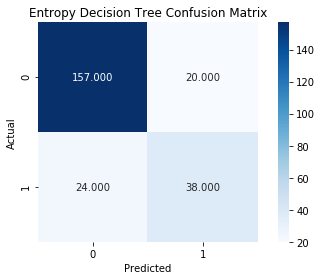

In [106]:
conf_matrix = metrics.confusion_matrix(classifier_y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Entropy Decision Tree Confusion Matrix')
plt.tight_layout()

In [107]:
accuracy = metrics.accuracy_score(classifier_y_test,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(classifier_y_test,y_pred,average = None)
recall = metrics.recall_score(classifier_y_test,y_pred,average=None)
F1_score = metrics.f1_score(classifier_y_test,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.8158995815899581, 0.18410041841004188, array([0.86740331, 0.65517241]), array([0.88700565, 0.61290323]), array([0.87709497, 0.63333333])]


In [108]:
Gclassifier = DecisionTreeClassifier(criterion="gini")
Gclassifier.fit(x_train_scaled,classifier_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [109]:
y_pred = Gclassifier.predict(x_val_scaled)

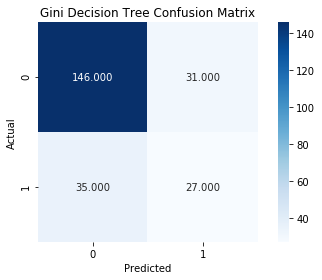

In [110]:
conf_matrix = metrics.confusion_matrix(classifier_y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Gini Decision Tree Confusion Matrix')
plt.tight_layout()

In [111]:
accuracy = metrics.accuracy_score(classifier_y_test,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(classifier_y_test,y_pred,average = None)
recall = metrics.recall_score(classifier_y_test,y_pred,average=None)
F1_score = metrics.f1_score(classifier_y_test,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.7238493723849372, 0.2761506276150628, array([0.80662983, 0.46551724]), array([0.82485876, 0.43548387]), array([0.81564246, 0.45      ])]


In [112]:
#Entropy is clearly better a model here 

In [113]:
#K-nearest Neighbors
#Chose the best number of neighbors based of accuracy
neighbors = [2,3,5,10,15,25,50]
prevAccuracy = 0.0
myN = 0
for n in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = n)
    classifier.fit(x_train_scaled,classifier_y_train)
    y_pred = classifier.predict(x_val_scaled)
    accuracy = metrics.accuracy_score(classifier_y_test,y_pred)
    if(accuracy > prevAccuracy):
        prevAccuracy = accuracy
        myN = n

print(myN)    

15


In [114]:
#Best model is with 15 neighbors
#Compute statistics
classifier = KNeighborsClassifier(n_neighbors = 15)
classifier.fit(x_train_scaled,classifier_y_train)
y_pred = classifier.predict(x_val_scaled)

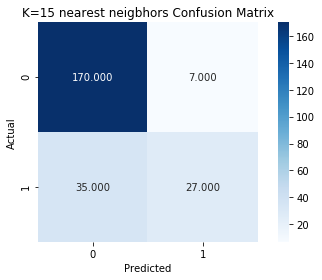

In [115]:
conf_matrix = metrics.confusion_matrix(classifier_y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('K=15 nearest neigbhors Confusion Matrix')
plt.tight_layout()

In [116]:
accuracy = metrics.accuracy_score(classifier_y_test,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(classifier_y_test,y_pred,average = None)
recall = metrics.recall_score(classifier_y_test,y_pred,average=None)
F1_score = metrics.f1_score(classifier_y_test,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.8242677824267782, 0.17573221757322177, array([0.82926829, 0.79411765]), array([0.96045198, 0.43548387]), array([0.89005236, 0.5625    ])]


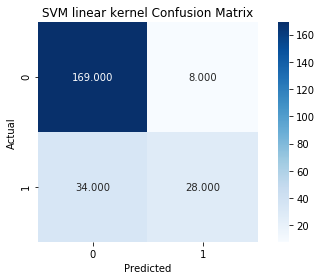

In [117]:
#SVMs
#First try to find the best kernel 
classifier = SVC(kernel = 'linear')
classifier.fit(x_train_scaled,classifier_y_train)
y_pred = classifier.predict(x_val_scaled)

conf_matrix = metrics.confusion_matrix(classifier_y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM linear kernel Confusion Matrix')
plt.tight_layout()

In [118]:
accuracy = metrics.accuracy_score(classifier_y_test,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(classifier_y_test,y_pred,average = None)
recall = metrics.recall_score(classifier_y_test,y_pred,average=None)
F1_score = metrics.f1_score(classifier_y_test,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.8242677824267782, 0.17573221757322177, array([0.83251232, 0.77777778]), array([0.95480226, 0.4516129 ]), array([0.88947368, 0.57142857])]


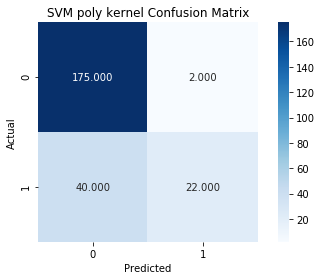

In [121]:
#SVMs
#First try to find the best kernel 
classifier = SVC(kernel = 'poly')
classifier.fit(x_train_scaled,classifier_y_train)
y_pred = classifier.predict(x_val_scaled)

conf_matrix = metrics.confusion_matrix(classifier_y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM poly kernel Confusion Matrix')
plt.tight_layout()

In [122]:
accuracy = metrics.accuracy_score(classifier_y_test,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(classifier_y_test,y_pred,average = None)
recall = metrics.recall_score(classifier_y_test,y_pred,average=None)
F1_score = metrics.f1_score(classifier_y_test,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.8242677824267782, 0.17573221757322177, array([0.81395349, 0.91666667]), array([0.98870056, 0.35483871]), array([0.89285714, 0.51162791])]


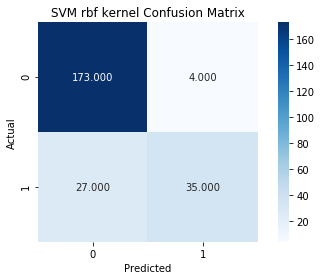

In [124]:
#SVMs
#First try to find the best kernel 
classifier = SVC(kernel = 'rbf')
classifier.fit(x_train_scaled,classifier_y_train)
y_pred = classifier.predict(x_val_scaled)

conf_matrix = metrics.confusion_matrix(classifier_y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM rbf kernel Confusion Matrix')
plt.tight_layout()

In [125]:
accuracy = metrics.accuracy_score(classifier_y_test,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(classifier_y_test,y_pred,average = None)
recall = metrics.recall_score(classifier_y_test,y_pred,average=None)
F1_score = metrics.f1_score(classifier_y_test,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.8702928870292888, 0.12970711297071125, array([0.865    , 0.8974359]), array([0.97740113, 0.56451613]), array([0.91777188, 0.69306931])]


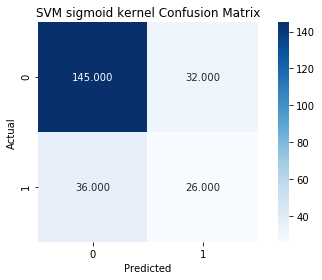

In [126]:
#SVMs
#First try to find the best kernel 
classifier = SVC(kernel = 'sigmoid')
classifier.fit(x_train_scaled,classifier_y_train)
y_pred = classifier.predict(x_val_scaled)

conf_matrix = metrics.confusion_matrix(classifier_y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM sigmoid kernel Confusion Matrix')
plt.tight_layout()

In [127]:
accuracy = metrics.accuracy_score(classifier_y_test,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(classifier_y_test,y_pred,average = None)
recall = metrics.recall_score(classifier_y_test,y_pred,average=None)
F1_score = metrics.f1_score(classifier_y_test,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.7154811715481172, 0.2845188284518828, array([0.80110497, 0.44827586]), array([0.81920904, 0.41935484]), array([0.81005587, 0.43333333])]


In [128]:
# Rbf is the best kernel

In [140]:
# Now try to find the best c value
# based on accuracy 
values = [0.001,0.01,0.1,0.5,1.0,5.0,10]
prevAcc = 0.0
cVal = -1
for v in values:
    classifier = SVC(kernel = 'rbf', C = v)
    classifier.fit(x_train_scaled,classifier_y_train)
    y_pred = classifier.predict(x_val_scaled)
    accuracy = metrics.accuracy_score(classifier_y_test,y_pred)
    if(accuracy > prevAcc):
        prevAcc = accuracy
        cVal = v
print(cVal)

1.0


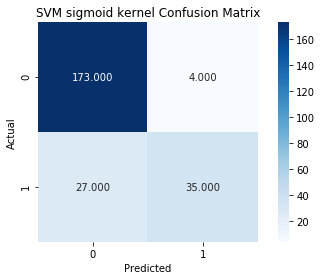

In [141]:
#best c val is 1.0 
# get metrics
classifier = SVC(kernel = 'rbf',C=1.0)
classifier.fit(x_train_scaled,classifier_y_train)
y_pred = classifier.predict(x_val_scaled)

conf_matrix = metrics.confusion_matrix(classifier_y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".3f",square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM sigmoid kernel Confusion Matrix')
plt.tight_layout()

In [142]:
accuracy = metrics.accuracy_score(classifier_y_test,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(classifier_y_test,y_pred,average = None)
recall = metrics.recall_score(classifier_y_test,y_pred,average=None)
F1_score = metrics.f1_score(classifier_y_test,y_pred,average = None)
print([accuracy,error,precision,recall,F1_score])

[0.8702928870292888, 0.12970711297071125, array([0.865    , 0.8974359]), array([0.97740113, 0.56451613]), array([0.91777188, 0.69306931])]


In [ ]:
#Task 6

In [1]:
fips = merged_data['FIPS'].tolist()
values = merged_data['Party'].tolist()

fig = ff.create_choropleth(fips=fips, values=values, colorscale=['rgb(255, 0, 0)', 'rgb(0, 0, 255)'], title='US Counties Political Map', legend_title='1 = Democratic, 0 = Republican')
fig.layout.template = None
fig.show()

NameError: name 'merged_data' is not defined